# k-Nearest Neighbors

One of the most simple yet effective methods to automaticlally classify examples is the K-Nearest Neighbors	algorithm (KNN). This algorithm is instance-based and non parametric : it does not try to model the examples to take a decision and, at test time, it only compares the new examples to the ones already seen during the training phase.



## A simple example on a toy problem

### Exercise

You need to classify objects on which you have measured the length and width. The following objetcs have already been measured : 
 
A(1,1), B(3,1), C(2,2), D(6,2), E(2,3), F(5,3), G(7,3), H(6,4), I(3.5,3), J(5,6)

The classes of the points are the following : 

* classe 1 : A,B,C and E
* classe 2 : F, G, H, and J


<img src="https://kermorvant.github.io/ml/images/exo_knn_points.png">
 
The distance between all the objects has been computed : 

<img src="https://kermorvant.github.io/ml/images/exo_knn_distances.png" style="width:450px;">

**Question:**
> What is the predicted class for the points D and I using a kNN classifier with k=1 and for k= 2 ?


### Code

Now, let's use scikit-learn to make the prediction. We will store the data into a pandas's dataframe : 


In [2]:
import pandas as pd
df = pd.DataFrame([[5,3,'2'],[7,3,'2'],[6,4,'2'],[5,6,'2'],
                    [1,1.0,'1'],[3,1,'1'],[2,2,'1'],[2,3,'1'],
                   [6,2,'?'],[3.5,3,'?']],
                  columns=['length','width','class'],
                  index=['F','G','H','J','A','B','C','E','D','I']
                 )
df

,length,width,class
F,5.0,3.0,2
G,7.0,3.0,2
H,6.0,4.0,2
J,5.0,6.0,2
A,1.0,1.0,1
B,3.0,1.0,1
C,2.0,2.0,1
E,2.0,3.0,1
D,6.0,2.0,?
I,3.5,3.0,?


Let's plot the data with the following code : 

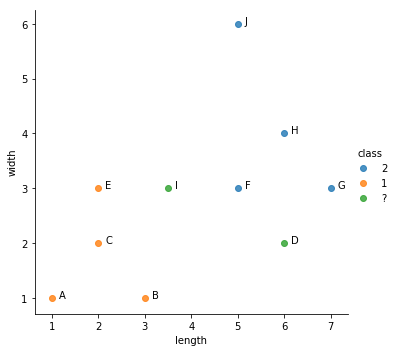

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Display graphics in notebook
%matplotlib inline 
sns.lmplot(x="length", y="width",hue='class', data=df,fit_reg=False);
# Add the point's names
for i, point in df.iterrows():
        plt.gca().text(point['length']+.15, point['width'], str(i))


Now, we need to define the training and test sets : points A to J are in training set and points D and I are in test set. The features (X) are the length and the width of the object and the class is the target (y). Use the slicing notation to define the train and test set :

* `data[0:5]` : select the lines form 0 (the first index in python) to 5 excluded;
    * `data[0:5][['length','class']]` : select the columns length and class
* `data['class']` : select the column class


In [4]:
# YOUR CODE HERE, replace None with the correct values
X_train = df[0:8][['length', 'width']]
y_train = df[0:8][['class']]
X_test = df[8:][['length', 'width']]
y_test = df[8:][['class']]


In [5]:
# Check that this your code is correct
assert(len(X_train)==8)
assert(len(y_train)==len(X_train))
assert(len(X_test)==2)
assert(len(y_test)==len(X_test))
print ('All is correct')

All is correct


We make the prediction with the [NearestNeighbor classifier from scikit-learn] (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

First the classifier is trained with the function `.fit(features_train,target_train)` using the training set features and target. 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(None,None)# YOUR CODE HERE


Then the classifier is tested  on the test set with  `.predict(features_test)`. 

In [ ]:
predictions = clf.predict(None)# YOUR CODE HERE
print (X_test.index[0], 'is of class',predictions[0])
print (X_test.index[1], 'is of class',predictions[1])


**Question:**
> * Explain why both D and I examples are predicted to belong to the class 2. 
> * Change the number of nearest neighbors in the classifier and study the impact on the classification of D and I